In [1]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
data_set=pd.read_csv(io.BytesIO(uploaded["Churn_Modelling.csv"]))

In [3]:
data_set.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data_set.shape

(10000, 14)

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data_set.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: ylabel='Density'>

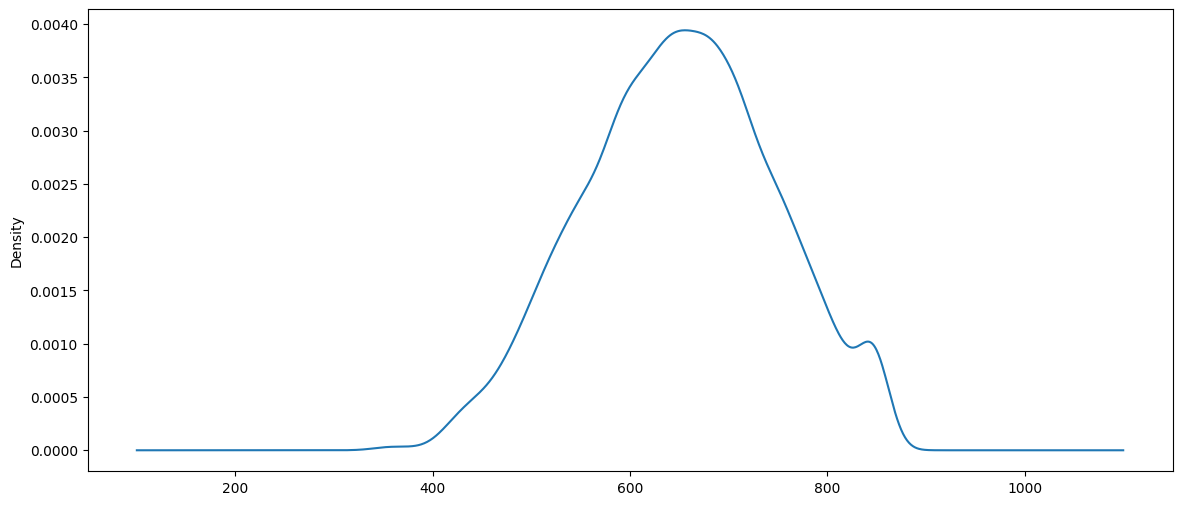

In [7]:
data_set['CreditScore'].plot(kind='density',figsize=(14,6))

<Axes: ylabel='Density'>

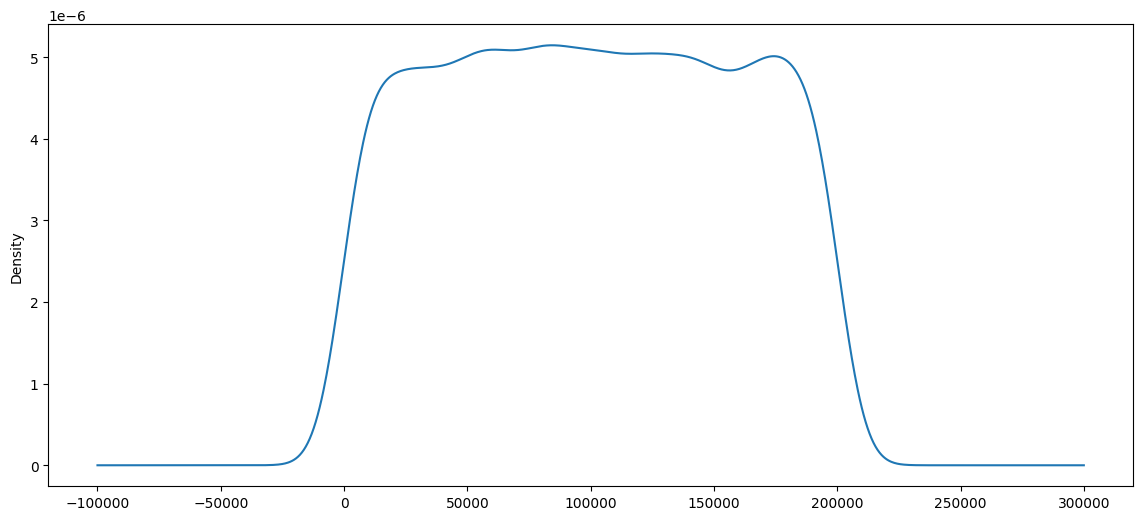

In [8]:
data_set['EstimatedSalary'].plot(kind='density',figsize=(14,6))

<Axes: ylabel='Frequency'>

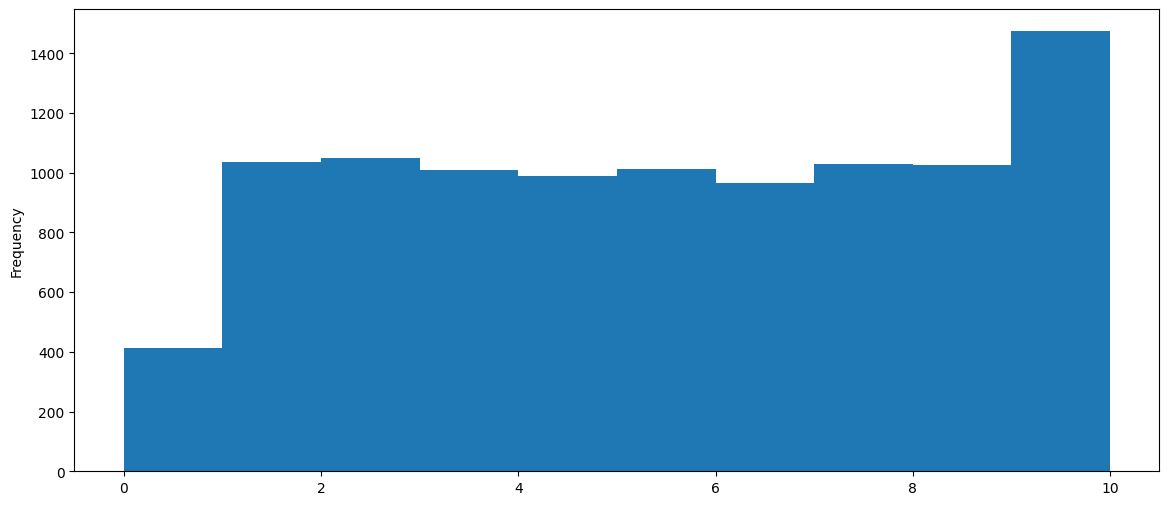

In [9]:
data_set['Tenure'].plot(kind='hist', figsize=(14,6))

In [10]:
data_set['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

<Axes: ylabel='Age'>

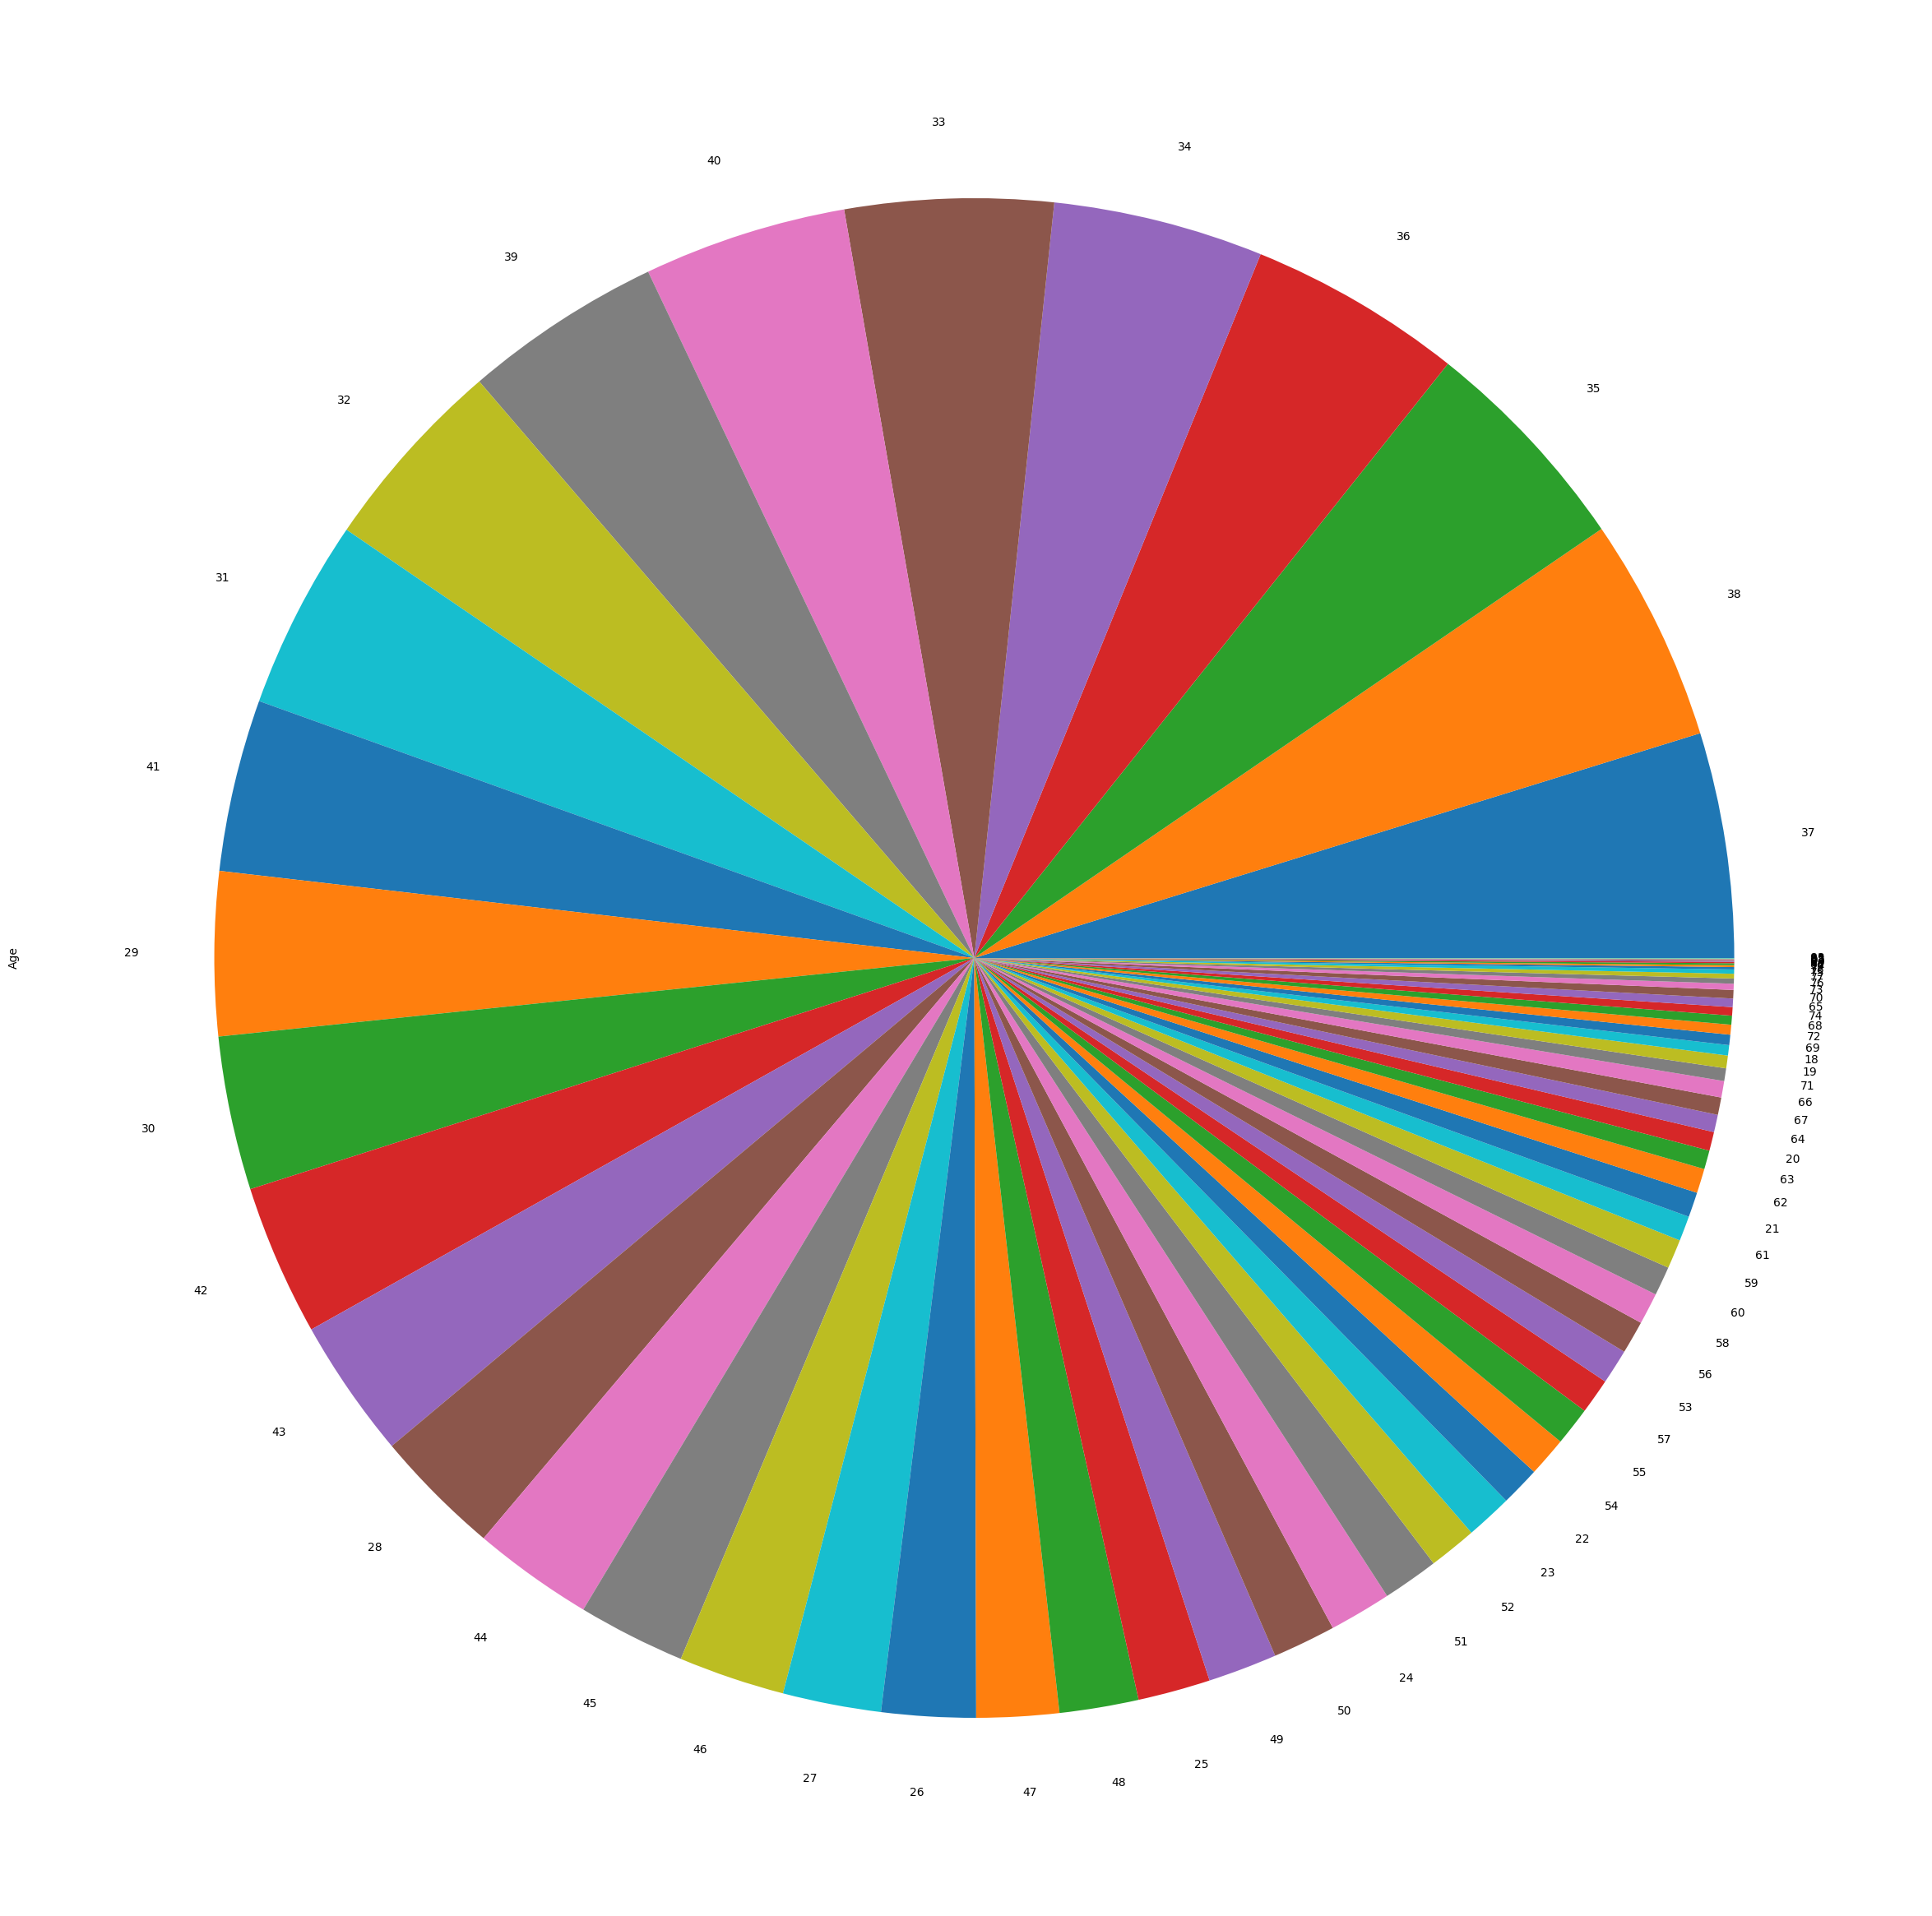

In [13]:
data_set['Age'].value_counts().plot(kind='pie', figsize=(30,30))

Text(0, 0.5, 'number of customers')

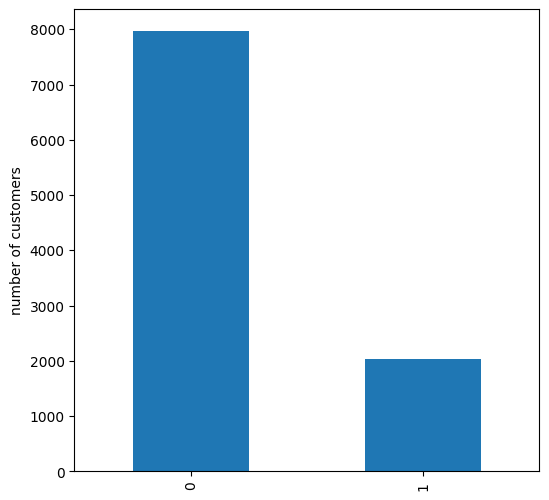

In [14]:
ax=data_set['Exited'].value_counts().plot(kind='bar', figsize=(6,6))
ax.set_ylabel('number of customers')

Text(0, 0.5, 'number of contry present')

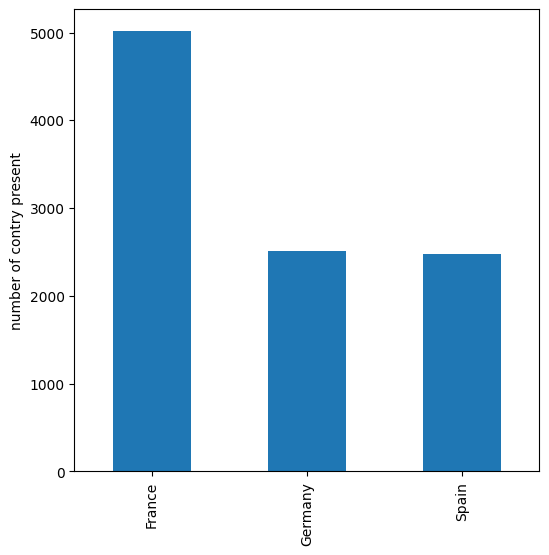

In [15]:
ax=data_set['Geography'].value_counts().plot(kind='bar', figsize=(6,6))
ax.set_ylabel('number of contry present')

In [16]:
corr=data_set.corr()
corr

<ipython-input-16-e791f40477a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data_set.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


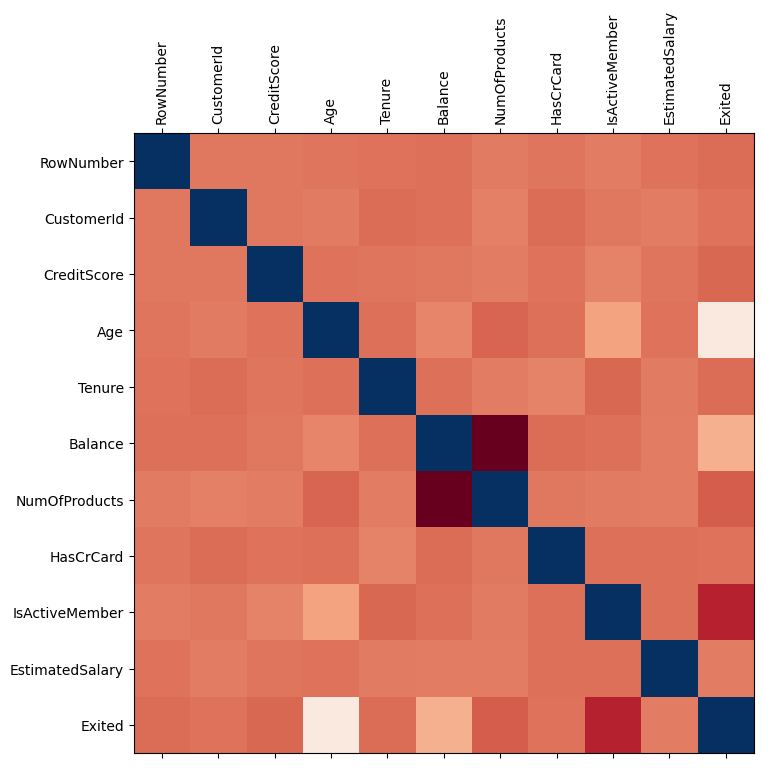

In [17]:
fig=plt.figure(figsize=(8,8))
plt.matshow(corr,cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

<Axes: xlabel='Exited', ylabel='Age'>

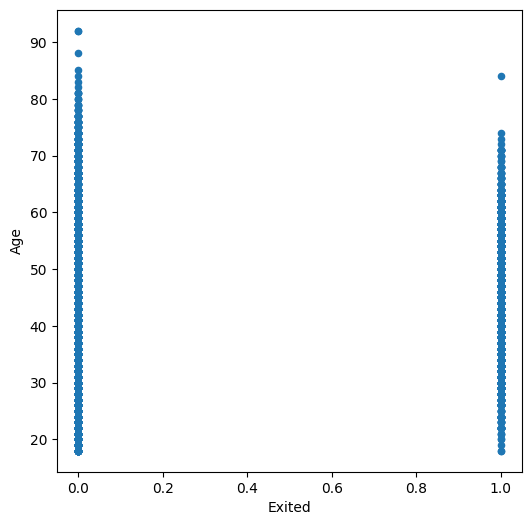

In [18]:
data_set.plot(kind='scatter', x="Exited",y="Age", figsize=(6,6))

In [19]:
data_set=data_set.drop(['CustomerId','RowNumber','Surname'],axis='columns')
data_set

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [20]:
data_set=data_set.replace(['Male','Female'],[1,2])
data_set=data_set.replace(['Spain','France','Germany'],[11,12,13])
data_set

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,12,2,42,2,0.00,1,1,1,101348.88,1
1,608,11,2,41,1,83807.86,1,0,1,112542.58,0
2,502,12,2,42,8,159660.80,3,1,0,113931.57,1
3,699,12,2,39,1,0.00,2,0,0,93826.63,0
4,850,11,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,12,1,39,5,0.00,2,1,0,96270.64,0
9996,516,12,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,12,2,36,7,0.00,1,0,1,42085.58,1
9998,772,13,1,42,3,75075.31,2,1,0,92888.52,1


In [21]:
train_set, test_set = train_test_split(data_set,random_state=42,test_size=0.2)
print(train_set.shape, test_set.shape)

(8000, 11) (2000, 11)


In [23]:
y_true = train_set['Exited']
X_train = train_set.drop('Exited', axis=1)

In [24]:
model=LogisticRegression(random_state=17,n_jobs=4)
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
result=cross_val_score(model,X_train,y_true ,cv=skf,scoring='f1_micro')
result.mean()

0.7887500000000001

In [25]:
model.fit(X_train,y_true)

LogisticRegression(n_jobs=4, random_state=17)

In [26]:
y_true = test_set['Exited']
X_test = test_set.drop('Exited', axis=1)
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,13,1,32,3,96709.07,2,0,0,41788.37
4684,623,12,1,43,1,0.00,2,1,1,146379.30
1731,601,11,2,44,4,0.00,2,1,0,58561.31
4742,506,13,1,59,8,119152.10,2,1,1,170679.74
4521,560,11,2,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...
6412,602,13,2,53,5,98268.84,1,0,1,45038.29
8285,609,12,1,25,10,0.00,1,0,1,109895.16
7853,730,12,2,47,7,0.00,1,1,0,33373.26
1095,692,12,1,29,4,0.00,1,1,0,76755.99


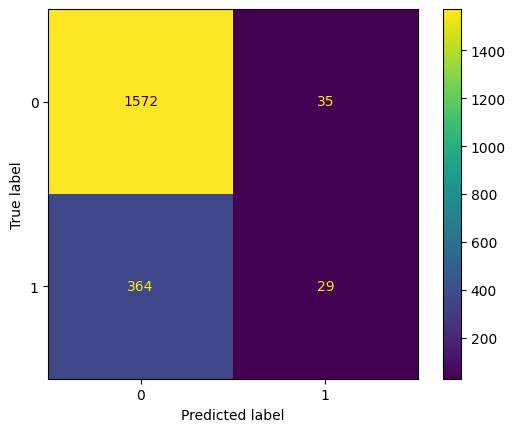

In [27]:
predictions=model.predict(X_test)
cm=confusion_matrix(y_true,predictions)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_).plot()
plt.show()

In [29]:
Exited=data_set[data_set["Exited"]==1]
Not_Exited=data_set[data_set["Exited"]==0]
new_data1=pd.concat([Exited, Not_Exited[:2037]])
new_data1.sample(frac=1,random_state=42)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8448,508,12,1,49,1,93817.41,2,1,1,132468.76,1
21,636,11,2,32,8,0.00,2,1,0,138555.46,0
2539,584,13,2,46,6,87361.02,2,1,0,120376.87,1
2098,601,12,2,43,2,0.00,1,1,0,49713.87,1
810,618,12,2,35,10,0.00,2,1,0,180439.75,0
...,...,...,...,...,...,...,...,...,...,...,...
5371,712,12,1,33,3,153819.58,1,1,0,79176.09,1
6255,547,13,1,55,4,111362.76,3,1,0,16922.28,1
4076,672,12,2,50,1,0.00,1,1,0,12106.82,1
1853,730,12,2,41,4,167545.32,1,1,0,128246.81,0


In [30]:
train_set1, test_set1 = train_test_split(new_data1,random_state=42,test_size=0.2)
print(train_set1.shape, test_set1.shape)

(3259, 11) (815, 11)


In [31]:
y_true1 = train_set1['Exited']
X_train1 = train_set1.drop('Exited', axis=1)
X_train1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
522,527,11,1,37,5,93722.73,2,1,1,139093.73
726,580,12,1,37,9,0.00,2,0,1,77108.66
1128,675,12,2,32,2,155663.31,1,1,0,97658.66
430,619,13,1,57,3,137946.39,1,1,1,72467.99
5087,740,11,1,43,9,0.00,1,1,0,199290.68
...,...,...,...,...,...,...,...,...,...,...
5371,712,12,1,33,3,153819.58,1,1,0,79176.09
6255,547,13,1,55,4,111362.76,3,1,0,16922.28
4076,672,12,2,50,1,0.00,1,1,0,12106.82
1853,730,12,2,41,4,167545.32,1,1,0,128246.81


In [32]:
model=LogisticRegression(random_state=17,n_jobs=4)
skf=StratifiedKFold(n_splits=15, shuffle=True, random_state=17)
result=cross_val_score(model,X_train1,y_true1,cv=skf,scoring='f1_micro')
result.mean()

0.6569258304091095

In [33]:
model.fit(X_train1,y_true1)

LogisticRegression(n_jobs=4, random_state=17)

In [34]:
y_true2 = test_set1['Exited']
X_test2 = test_set1.drop('Exited', axis=1)
X_test2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8448,508,12,1,49,1,93817.41,2,1,1,132468.76
21,636,11,2,32,8,0.00,2,1,0,138555.46
2539,584,13,2,46,6,87361.02,2,1,0,120376.87
2098,601,12,2,43,2,0.00,1,1,0,49713.87
810,618,12,2,35,10,0.00,2,1,0,180439.75
...,...,...,...,...,...,...,...,...,...,...
316,559,12,1,49,2,147069.78,1,1,0,120540.83
914,569,12,1,35,10,124525.52,1,1,1,193793.78
2445,665,12,2,34,5,67816.72,1,1,1,29641.58
1070,686,13,2,47,5,170935.94,1,1,0,173179.79


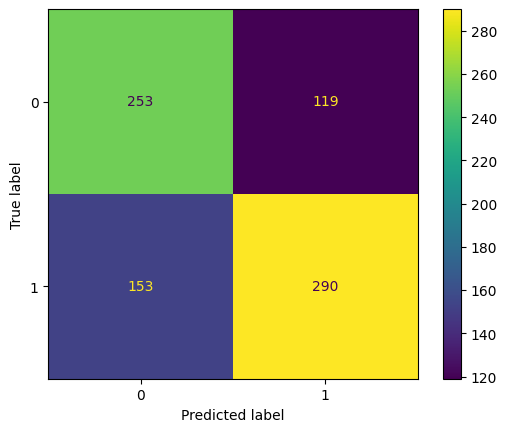

In [35]:
predictions=model.predict(X_test2)
cm=confusion_matrix(y_true2,predictions)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_).plot()
plt.show()

In [36]:
from sklearn.feature_selection import RFE

#intantiate RFE with 6 features to be selected
rfe_model=RFE(model, n_features_to_select=7)

#fit and train the RFE
rfe_model.fit(X_train1,y_true1)

#get the selected features
selected_fetures=rfe_model.support_

#subset the training data to include only selected features
selected_training_data=X_train1.loc[:,selected_fetures]

skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
result=cross_val_score(model,selected_training_data,y_true1,cv=skf,scoring='f1_micro')
result.mean()


0.7029723031108347

In [37]:
#fit and train the model on the given data
model.fit(selected_training_data,y_true1)

LogisticRegression(n_jobs=4, random_state=17)

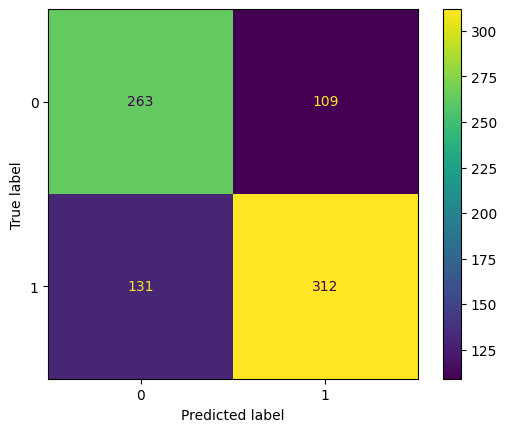

In [38]:
selected_testing_data=X_test2.loc[:,selected_fetures]

predictions=model.predict(selected_testing_data)

cm=confusion_matrix(y_true2,predictions)

ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_).plot()

plt.show()